Kaggle Titanic Challenge at the following link:

https://www.kaggle.com/c/titanic-gettingStarted

Downloaded train.csv and saved it to the location of notebook


In [1]:
#Opening using Pandas
import pandas as pd
from pandas import Series,DataFrame

In [2]:
titanic_df = pd.read_csv('train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


Basic questions tested:

1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
2.) What deck were the passengers on and how does that relate to their class?
3.) Where did the passengers come from?
4.) Who was alone and who was with family?

A broader question tested:

5.) What factors helped someone survive the sinking?

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

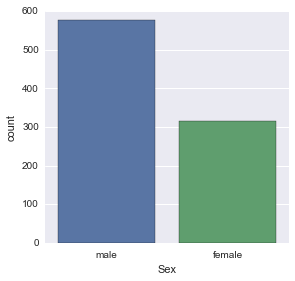

In [13]:
#checking the male to female ratio
sns.factorplot('Sex',data=titanic_df,kind='count')
#conclusion: more number of males, almost double the females on board

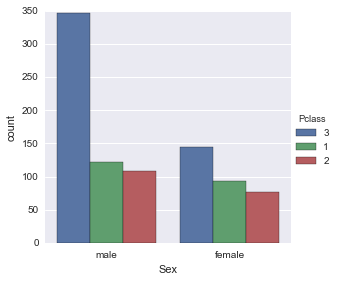

In [14]:
#to check the number of males and females in different passenger classes
sns.factorplot('Sex',data=titanic_df,kind='count',hue='Pclass')

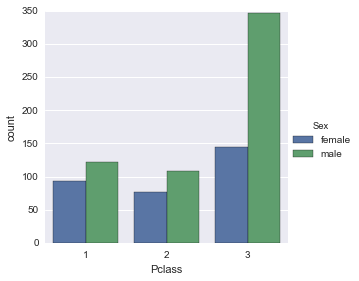

In [18]:
#turning things around, checking in each passenger class, male and female count
sns.factorplot('Pclass',data=titanic_df,kind='count',hue='Sex',order=[1,2,3],hue_order=['female','male'])
#Conclusion: more males in Pclass 3

In [20]:
#testing the theory "females and children" first
def male_female_child(passenger):
    age,sex = passenger
    if age <16:
        return 'child'
    else:
        return sex

In [22]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [23]:
titanic_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child


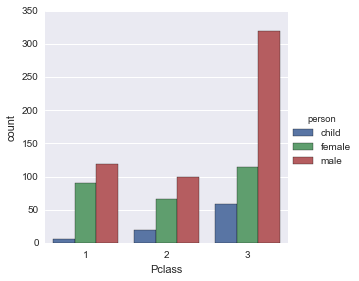

In [27]:
#checking in each class, how many, male, female and children(age<16)
sns.factorplot('Pclass',data=titanic_df,hue='person',kind='count',order=[1,2,3],hue_order=['child','female','male'])
#Conclusion: More children in third class again

29.69911764705882

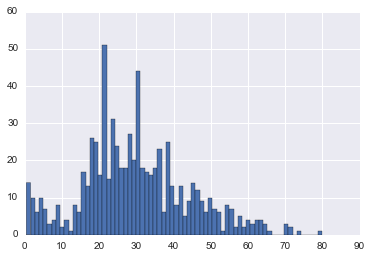

In [28]:
#get an idea of the age distribution, average age
titanic_df['Age'].hist(bins=70)
titanic_df['Age'].mean()

In [29]:
titanic_df['person'].value_counts() #checking the number of male, female and children

male      537
female    271
child      83
Name: person, dtype: int64

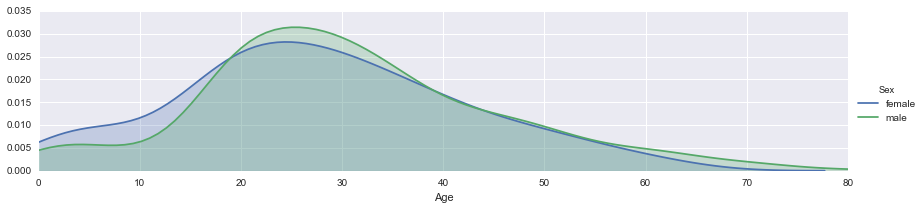

In [38]:
#KDE plots Male-female
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4,hue_order=['female','male'])
fig.map(sns.kdeplot,'Age',shade='True')
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

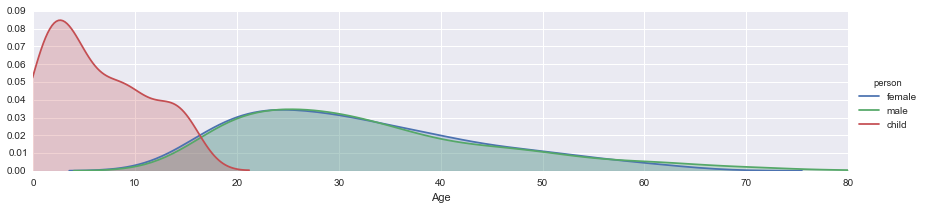

In [41]:
#KDE plots male-female-child
fig = sns.FacetGrid(titanic_df,hue='person',aspect=4,hue_order=['female','male','child'])
fig.map(sns.kdeplot,'Age',shade='True')
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
#Conclusion: children seems to be < 10, although calling teenagers children is, well, far fetched

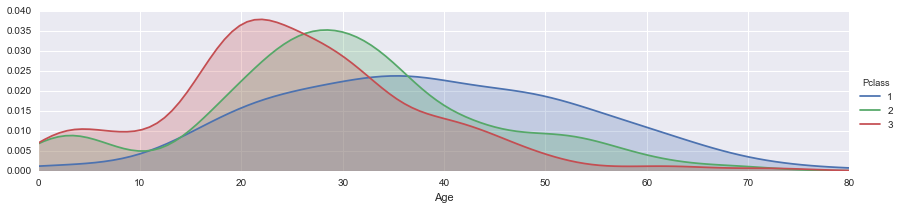

In [43]:
#KDE plots: Passenger class
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4,hue_order=[1,2,3])
fig.map(sns.kdeplot,'Age',shade='True')
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
#Conclusion: classes 2 and 3 are left skewed

In [44]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


In [45]:
deck = titanic_df['Cabin'].dropna()

In [46]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

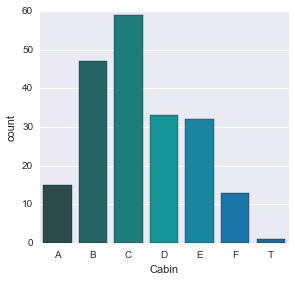

In [54]:
levels = []
for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.factorplot('Cabin',data=cabin_df,palette='winter_d',kind='count',order= ['A','B','C','D','E','F','T'])

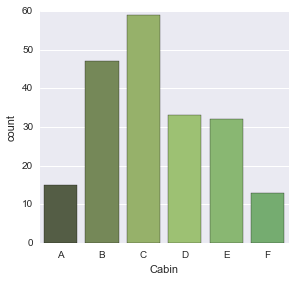

In [59]:
#dropping T values
cabin_df=cabin_df[cabin_df.Cabin != 'T']
sns.factorplot('Cabin',data=cabin_df,palette='summer_d',kind='count',order= ['A','B','C','D','E','F'])

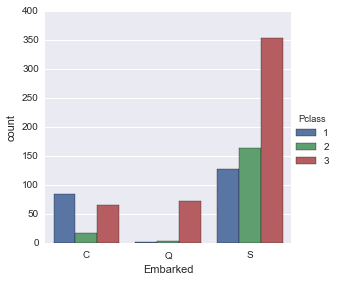

In [67]:
#Where did people come from, 3rd question
sns.factorplot('Embarked',data=titanic_df,hue='Pclass',order=['C','Q','S'],kind='count',hue_order=[1,2,3])
# Conclusion: Majority of people on board from Queenstown(Q) seem to be under 3rd class

In [68]:
#who was alone, who was with family
titanic_df.head()
#sib/sp: number of siblings/spouses on board
#Parch: number of parents/children on board

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


In [87]:
#adding up the two columns, 0 indicates traveling alone
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [89]:
titanic_df['Alone'].loc[titanic_df['Alone']>0]= 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0]= 'Alone'
titanic_df['Alone'].value_counts()

Alone          537
With Family    354
Name: Alone, dtype: int64

In [90]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone


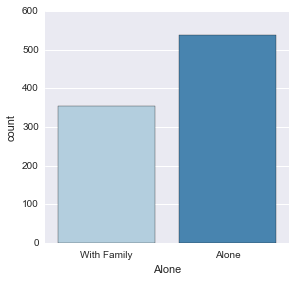

In [98]:
#Factorplot on whether a passenger was alone or with family
sns.factorplot('Alone', data=titanic_df,palette='Blues',kind='count')
# Conclusion: more people were alone

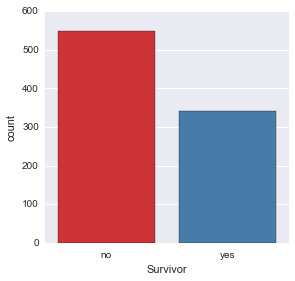

In [92]:
#Check to see who survived
titanic_df['Survivor']=titanic_df.Survived.map({0:'no',1:'yes'})
sns.factorplot('Survivor',data=titanic_df, kind='count',palette='Set1')

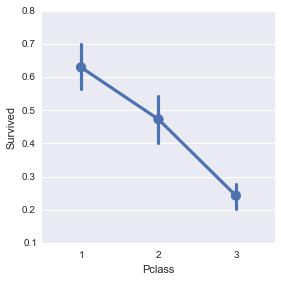

In [100]:
#if class was a factor in seeing who survived
sns.factorplot('Pclass','Survived',data=titanic_df,order=[1,2,3])
#CONCLUSION: upper class seems like more people survived, makes sense since more male in 3rd class, 
#is opposite to notion female and children first

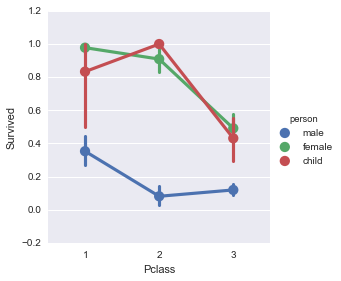

In [102]:
#if class and being male was a factor
sns.factorplot('Pclass','Survived',data=titanic_df,order=[1,2,3], hue='person')
#CONCLUSION: being a male and in third class seems to be bad for survival

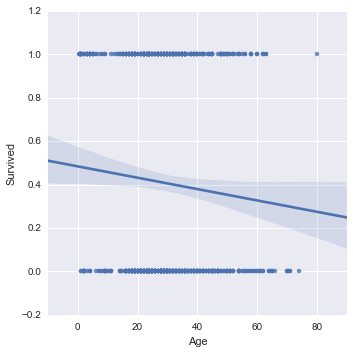

In [103]:
# was age a factor for survival
sns.lmplot('Age','Survived',data=titanic_df)
#Conclusion: older people have had bad luck surviving

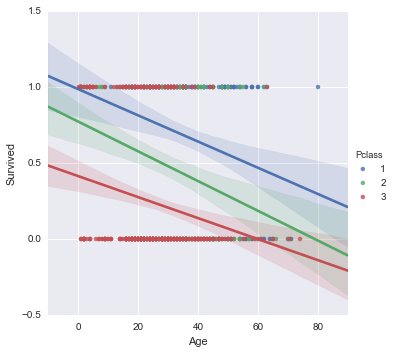

In [105]:
#was class a factor for survival along with age?
sns.lmplot('Age','Survived',data=titanic_df,hue='Pclass',hue_order=[1,2,3])
#Conclusion: older people and lower class had lower survival rate

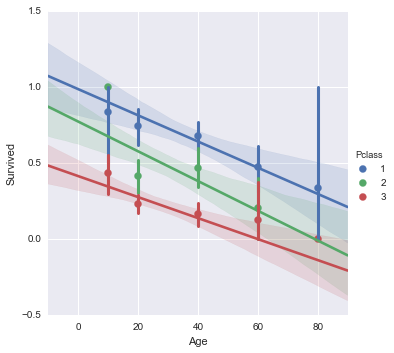

In [106]:
# grouping by age using bins and plotting again
generations =[10,20,40,60,80]

sns.lmplot('Age','Survived',data=titanic_df,hue='Pclass',hue_order=[1,2,3],x_bins=generations)
#Conclusion: older people from first class seems to have survived

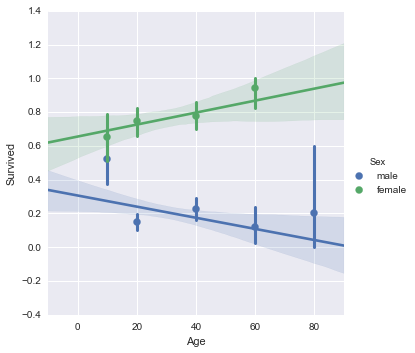

In [108]:
#gender and age vs surval
sns.lmplot('Age','Survived',data=titanic_df,hue='Sex',x_bins=generations)
#Conclusion: Older female has better survival than older male, it seems

1.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?

2.) Did having a family member increase the odds of surviving the crash?

In [131]:
#deck vs survival rate

#filling unknown values as "unknown"
titanic_df['Cabin'].fillna('Unknown',inplace=True)


In [118]:
#extract first letter from cabin column
levels = []
for level in titanic_df['Cabin']:
    levels.append(level[0])
titanic_df['CabinCode']=levels

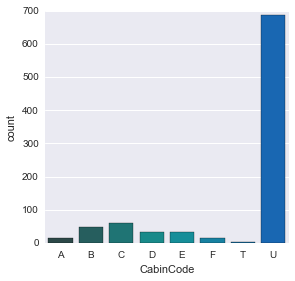

In [120]:
sns.factorplot('CabinCode',data=titanic_df,palette='winter_d',kind='count',order= ['A','B','C','D','E','F','T','U'])

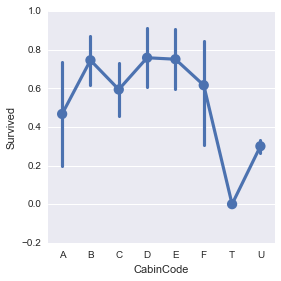

In [123]:
sns.factorplot('CabinCode','Survived',data=titanic_df,order=['A','B','C','D','E','F','T','U'])


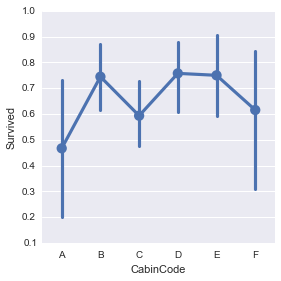

In [132]:
sns.factorplot('CabinCode','Survived',data=titanic_df,order=['A','B','C','D','E','F'])


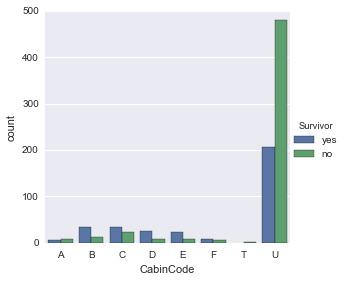

In [128]:
sns.factorplot('CabinCode',data=titanic_df,hue='Survivor',kind='count',hue_order=['yes','no'],order=['A','B','C','D','E','F','T','U'])

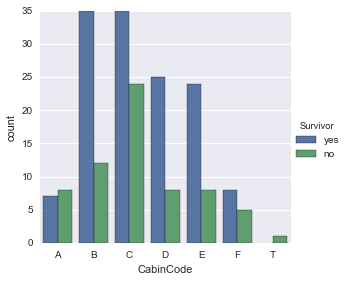

In [129]:
sns.factorplot('CabinCode',data=titanic_df,hue='Survivor',kind='count',hue_order=['yes','no'],order=['A','B','C','D','E','F','T'])

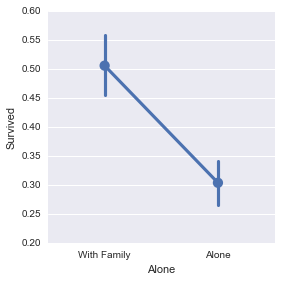

In [137]:
#Check to see who survived whether being Alone/Survived
sns.factorplot('Alone','Survived',data=titanic_df)